In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [129]:
exl = pd.read_excel ('Ds_Anime_1(500 anime).xlsx')
df = pd.DataFrame(exl)
df.head()

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
0,0,Shingeki no Kyojin,"['Action', 'Award Winning', 'Drama', 'Suspense...",TV,8.53,2549906,3569128,2013,24,25,Manga,Wit Studio
1,1,Death Note,"['Supernatural', 'Suspense', 'Psychological', ...",TV,8.62,2515605,3548915,2006,23,37,Manga,Madhouse
2,2,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",TV,9.12,1929885,3024015,2009,24,64,Manga,Bones
3,3,One Punch Man,"['Action', 'Comedy', 'Adult Cast', 'Parody', '...",TV,8.51,2043930,2917437,2015,24,12,Web manga,Madhouse
4,4,Sword Art Online,"['Action', 'Adventure', 'Fantasy', 'Romance', ...",TV,7.20,2008535,2842085,2012,23,25,Light novel,A-1 Pictures


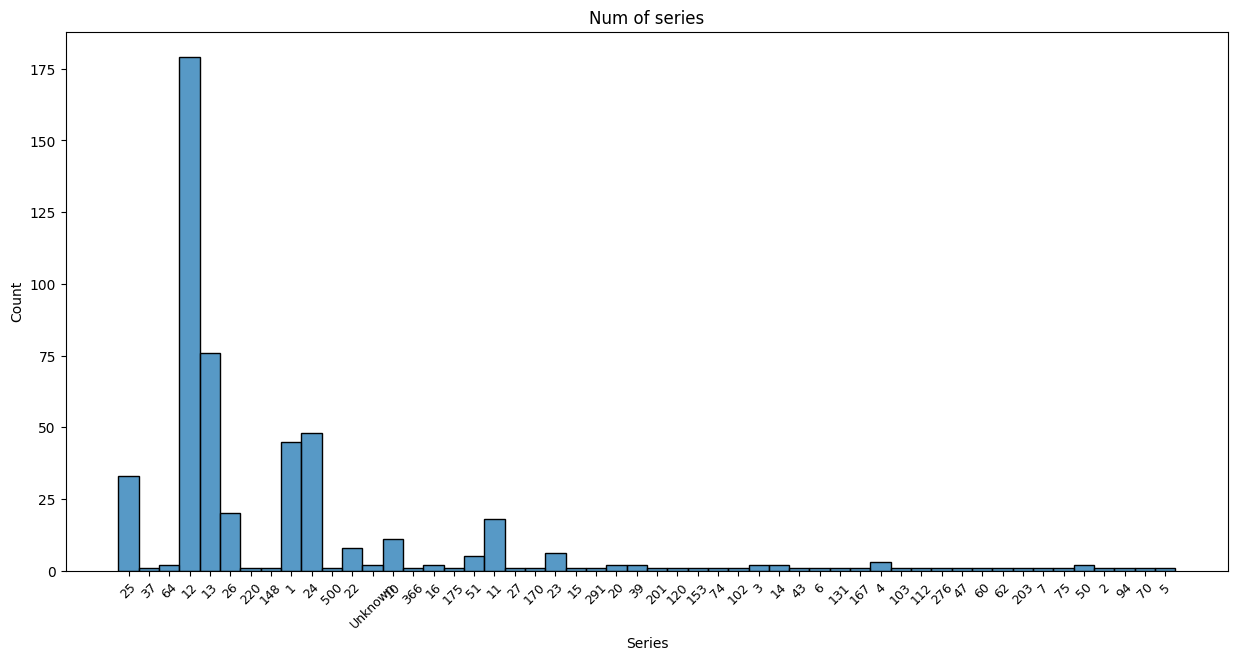

In [130]:
plt.figure(figsize=(15, 7))
sns.histplot(x=df.series, binwidth=0.05)
plt.xlabel('Series')
plt.xticks(rotation=45, size=9)
plt.title('Num of series')
plt.show()

Shortest lenght TV series

In [131]:
df[df.minutes == df.minutes.min()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
138,138,Saiki Kusuo no Ψ-nan,"['Comedy', 'Supernatural', 'Gag Humor', 'Schoo...",TV,8.42,545873,973150,2016,5,120,Manga,"['J.C.Staff', 'Egg Firm']"


Longest anime Movie

In [132]:
df[df.minutes == df.minutes.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
485,485,Kara no Kyoukai Movie 1: Fukan Fuukei,"['Action', 'Mystery', 'Supernatural', 'Suspense']",Movie,7.58,175176,398938,2007,300,1,Light novel,ufotable


Longest anime TV (Unknown - anime has not finished)

In [133]:
df[df.series == df.series.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
22,22,One Piece,"['Action', 'Adventure', 'Fantasy', 'Shounen']",TV,8.67,1146870,2009094,1999,24,Unknown,Manga,Toei Animation
196,196,Boruto: Naruto Next Generations,"['Action', 'Adventure', 'Fantasy', 'Martial Ar...",TV,5.75,392175,782673,2017,23,Unknown,Manga,Pierrot


Best anime

In [134]:
df[df.rating == df.rating.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
2,2,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",TV,9.12,1929885,3024015,2009,24,64,Manga,Bones


Worst anime

In [135]:
df[df.rating == df.rating.min()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
172,172,Yakusoku no Neverland 2nd Season,"['Sci-Fi', 'Suspense', 'Psychological', 'Survi...",TV,5.33,418505,838481,2021,22,11,Manga,CloverWorks


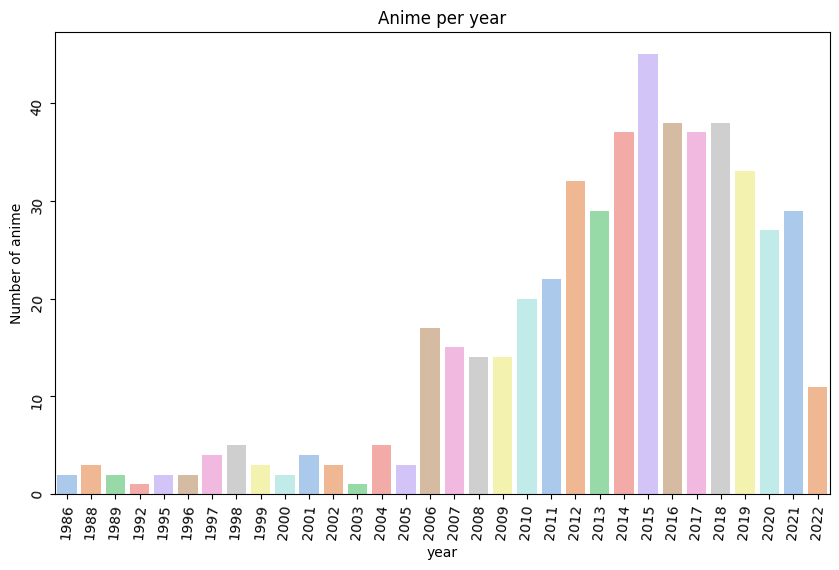

In [136]:
plt.figure(figsize=(10, 6))
sns.countplot(x= df.year, palette= 'pastel')
plt.title('Anime per year')
plt.ylabel('Number of anime')
plt.tick_params(rotation= 85)
plt.show()

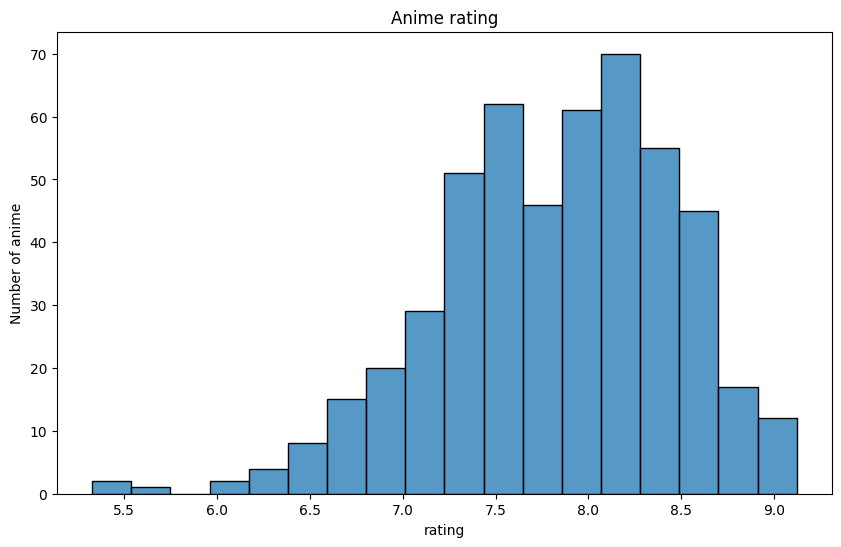

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df.rating)
plt.title('Anime rating')
plt.ylabel('Number of anime')
plt.show()

Word Cloud Titles

<function matplotlib.pyplot.show(close=None, block=None)>

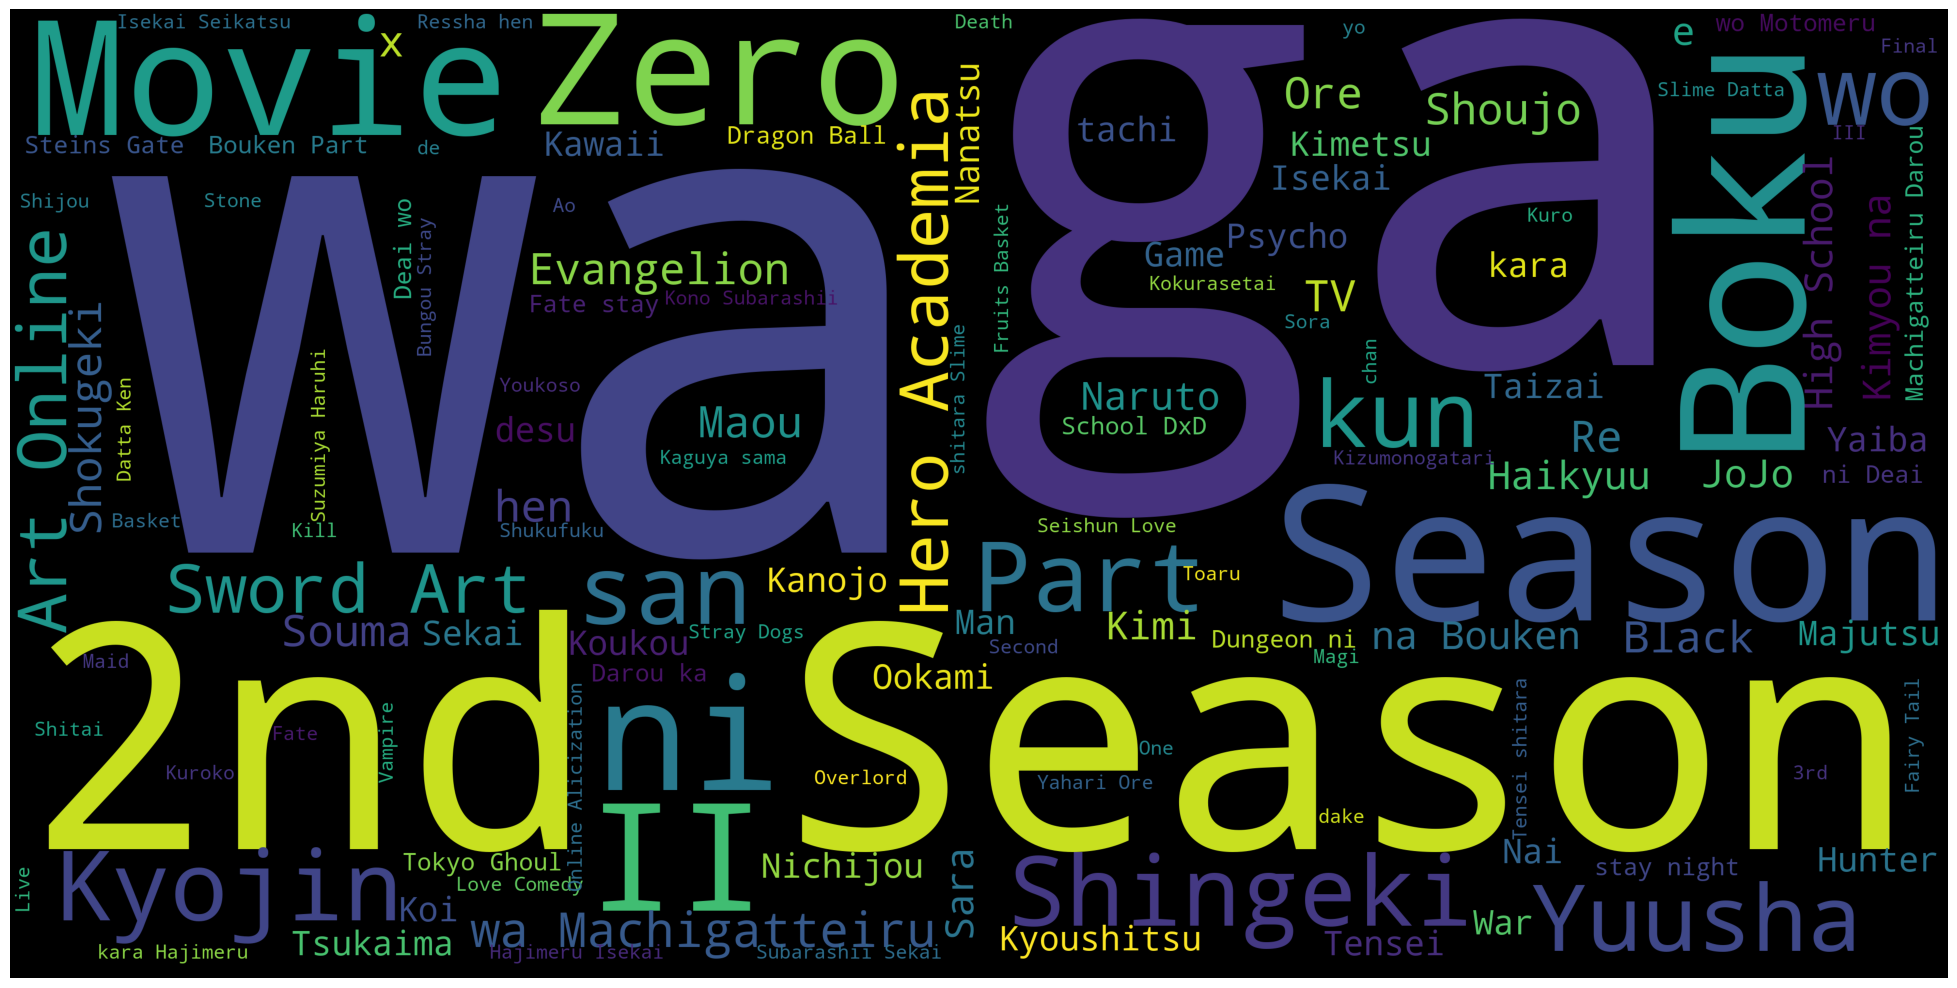

In [138]:
wc= WordCloud(
    max_words= 300,
    scale= 10
)
wc.generate(' '.join(df.title))
plt.figure(figsize=(25, 25))
plt.imshow(wc)
plt.axis('off')
plt.show

Word Cloud Studios

<function matplotlib.pyplot.show(close=None, block=None)>

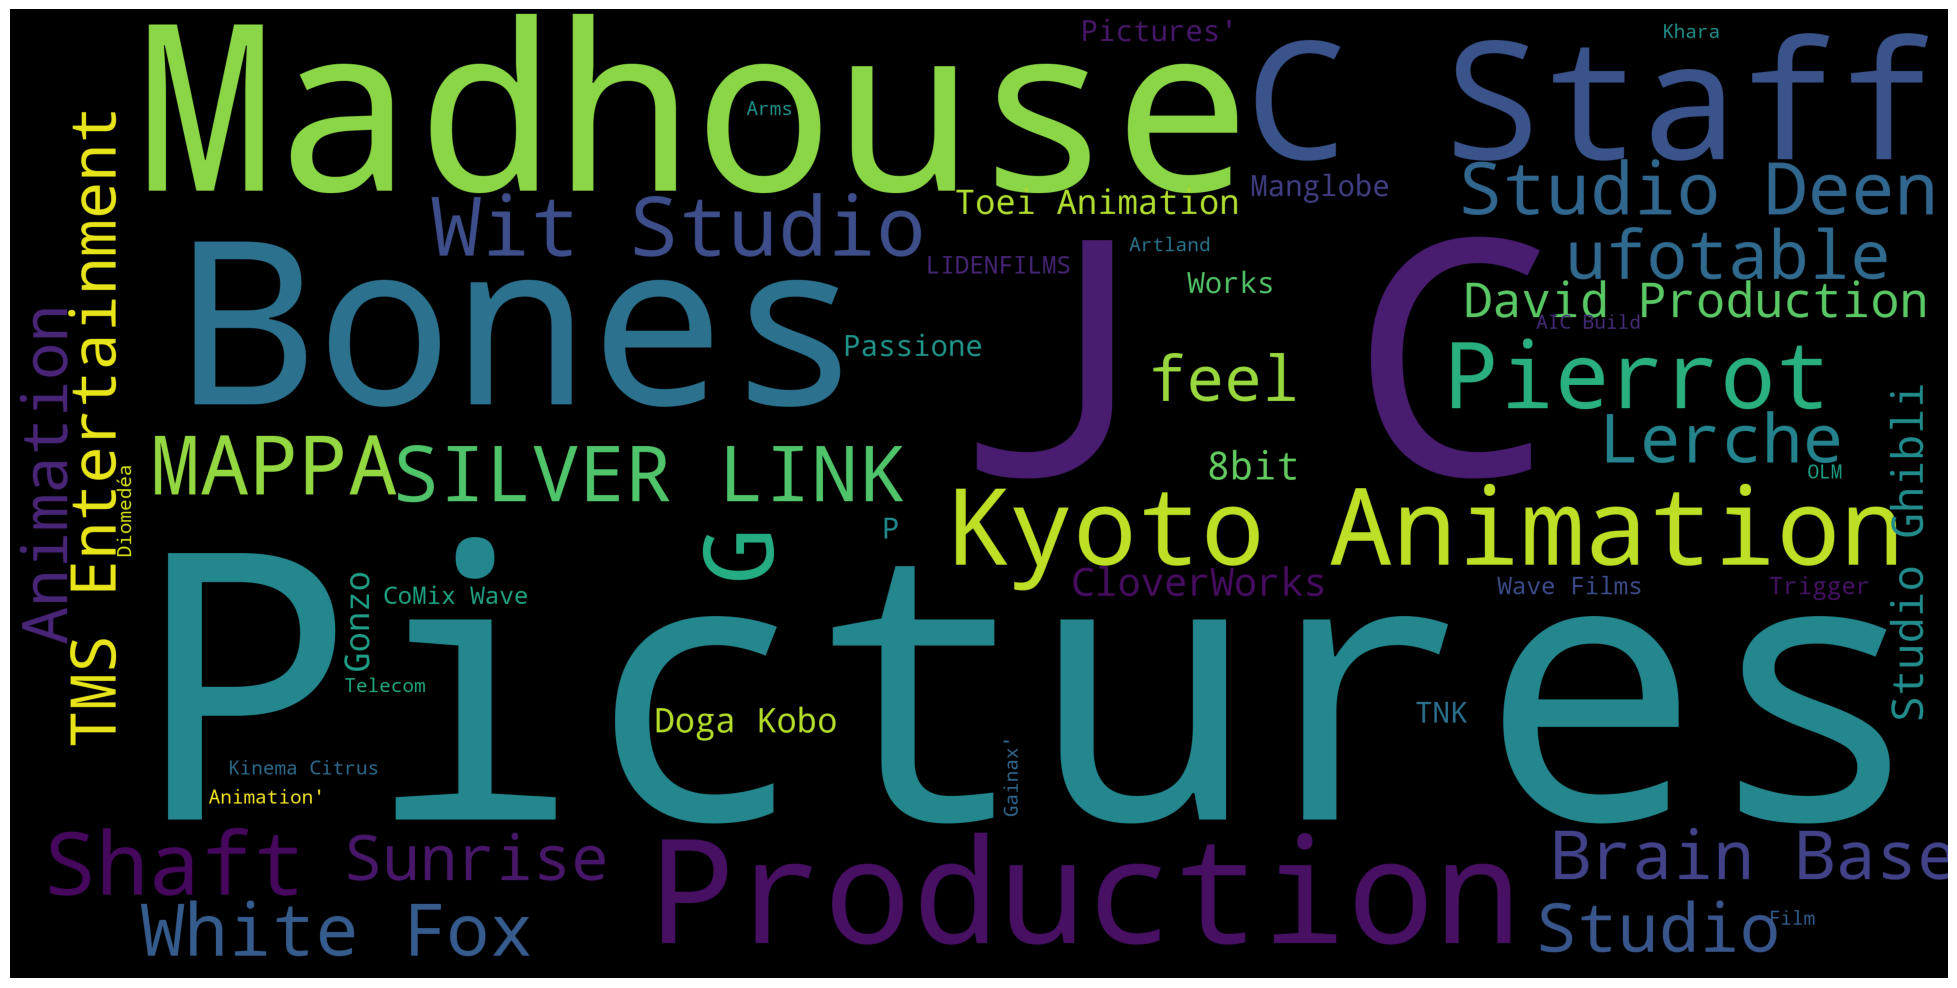

In [139]:
wc= WordCloud(
    max_words= 300,
    scale= 10
)
wc.generate(' '.join(df.studio))
plt.figure(figsize=(25, 25))
plt.imshow(wc)
plt.axis('off')
plt.show

# K-Means Clustering

In [140]:
X_old = df.iloc[:, [ 4, 7]].values
for i in range(len(X_old)):
    if X_old[i][1] < 2010.0:
        # print(type(X[i][1]))
        X_old[i] = 0
X = []
for i in range(len(X_old)):
    if sum(X_old[i]) == 0:
        pass
    elif sum(X_old[i]) > 0:
        X.append([X_old[i][0], X_old[i][1]])
X = np.array(X, dtype=float)

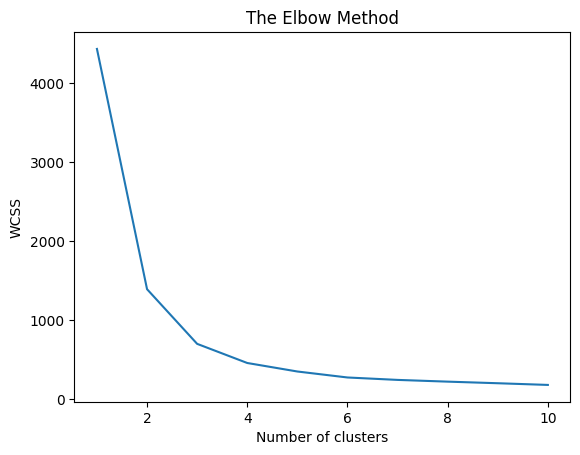

In [141]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
wcss
prop = []
for i in range(len(wcss)):
    print(wcss[i])
    if i == 0:
        pass
    elif i > 0:
        prop.append(wcss[i-1]/wcss[i])
prop.sort()
print(prop)
optimal_num_clusters = round(prop[-1])
print(optimal_num_clusters)

4429.719752763818
1388.6111251414795
696.71050574409
454.5334370526145
346.8893230131906
271.19991754140256
240.49138610976712
218.53507477810467
198.31671672962952
176.9840499012108
[1.1004704226722248, 1.1019498425644036, 1.120534403186763, 1.1276907748272498, 1.2790908129986176, 1.3103125605146706, 1.5328036376418273, 1.9930962913476329, 3.190036197004034]
3


In [149]:
kmeans = KMeans(n_clusters = optimal_num_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(X)

[[   8.53 2013.  ]
 [   8.51 2015.  ]
 [   7.2  2012.  ]
 [   7.91 2016.  ]
 [   8.53 2019.  ]
 [   7.79 2014.  ]
 [   9.04 2011.  ]
 [   8.86 2016.  ]
 [   8.5  2017.  ]
 [   9.08 2011.  ]
 [   8.13 2017.  ]
 [   8.1  2014.  ]
 [   8.62 2018.  ]
 [   8.95 2016.  ]
 [   8.66 2020.  ]
 [   8.66 2014.  ]
 [   7.96 2014.  ]
 [   8.24 2016.  ]
 [   8.06 2018.  ]
 [   9.06 2019.  ]
 [   8.07 2010.  ]
 [   7.47 2014.  ]
 [   8.31 2016.  ]
 [   7.69 2014.  ]
 [   7.44 2011.  ]
 [   8.49 2016.  ]
 [   6.7  2014.  ]
 [   8.09 2015.  ]
 [   7.51 2011.  ]
 [   8.45 2014.  ]
 [   8.53 2019.  ]
 [   8.12 2016.  ]
 [   8.82 2021.  ]
 [   8.34 2014.  ]
 [   7.03 2015.  ]
 [   8.16 2015.  ]
 [   8.04 2013.  ]
 [   8.67 2018.  ]
 [   7.48 2012.  ]
 [   8.26 2018.  ]
 [   7.93 2019.  ]
 [   8.17 2015.  ]
 [   8.29 2019.  ]
 [   8.41 2019.  ]
 [   8.34 2012.  ]
 [   8.32 2011.  ]
 [   7.48 2019.  ]
 [   7.22 2018.  ]
 [   7.9  2012.  ]
 [   7.75 2015.  ]
 [   7.77 2013.  ]
 [   8.13 2017.  ]
 [   7.92 20

In [166]:
df2 = df
y_kmeans_list = list(y_kmeans)
for i in range(len(y_kmeans_list)):
    y_kmeans_list[i] += 1

tmp = list(df.iloc[:, 7].values)

k = 0

clusters = []

for i in range(len(tmp)):
    if int(tmp[i]) >= 2010:
        clusters.append(y_kmeans_list[k])
        k+=1
    else:
        clusters.append('None')

print(clusters)

df2['Claster'] = clusters
df2.to_excel('Ds_Anime_1(500 anime)_clasters.xlsx')

[2, 'None', 'None', 1, 2, 1, 3, 'None', 1, 2, 1, 1, 2, 1, 'None', 1, 3, 1, 'None', 'None', 3, 1, 'None', 1, 1, 3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 'None', 3, 1, 'None', 'None', 1, 'None', 'None', 'None', 1, 2, 3, 2, 3, 3, 1, 3, 3, 2, 'None', 2, 3, 'None', 3, 2, 1, 2, 1, 1, 'None', 3, 1, 2, 2, 'None', 1, 1, 1, 'None', 3, 2, 2, 'None', 2, 1, 1, 3, 2, 2, 3, 1, 1, 1, 3, 2, 'None', 3, 2, 3, 2, 2, 2, 'None', 'None', 'None', 1, 3, 'None', 3, 2, 'None', 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 'None', 3, 2, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 1, 'None', 'None', 1, 2, 1, 'None', 2, 'None', 1, 2, 3, 1, 'None', 1, 'None', 3, 1, 3, 'None', 'None', 3, 2, 'None', 'None', 3, 1, 1, 1, 1, 3, 3, 'None', 2, 2, 1, 'None', 3, 'None', 3, 3, 3, 3, 1, 1, 2, 1, 3, 2, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 'None', 3, 'None', 2, 'None', 'None', 'None', 2, 2, 3, 2, 'None', 'None', 'None', 1, 3, 2, 1, 1, 1, 'None', 1, 1, 3, 1, 'None', 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1, 1, 1, 2, 3, 1, 1, 3, 'None', 2, 3, 'None

: 

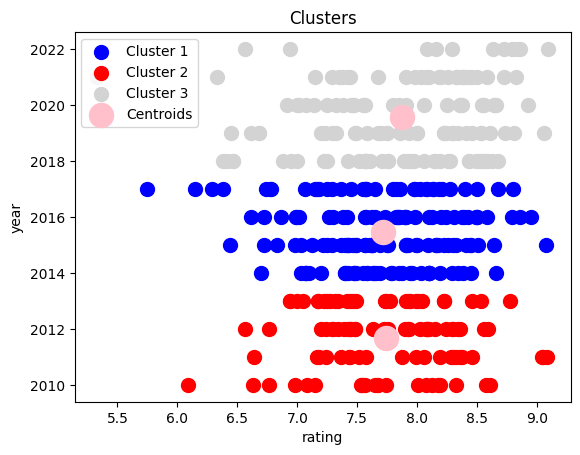

In [144]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightgray', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'pink', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('rating')
plt.ylabel('year')
plt.legend()
plt.show()

# Hierarchical Clustering

In [145]:
X_old = df.iloc[:, [ 4, 7]].values
for i in range(len(X_old)):
    if X_old[i][1] < 2010.0:
        # print(type(X[i][1]))
        X_old[i] = 0
X = []
for i in range(len(X_old)):
    if sum(X_old[i]) == 0:
        pass
    elif sum(X_old[i]) > 0:
        X.append([X_old[i][0], X_old[i][1]])
X = np.array(X, dtype=float)

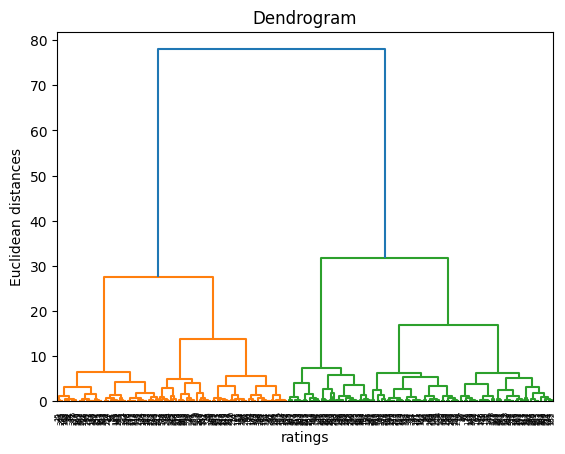

In [146]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('ratings')
plt.ylabel('Euclidean distances')
plt.show()

In [147]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = optimal_num_clusters, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

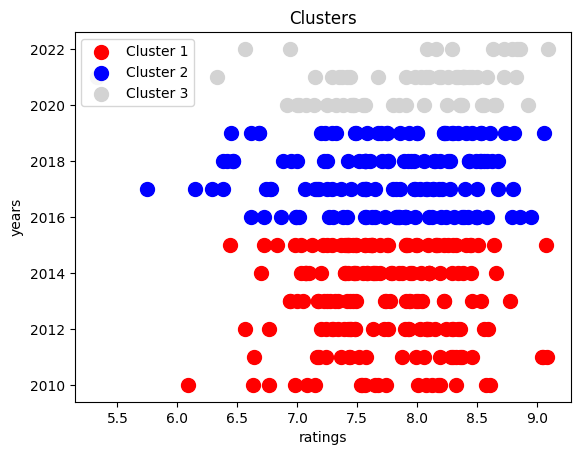

In [148]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'lightgray', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('ratings')
plt.ylabel('years')
plt.legend()
plt.show()